#### Grupo 8


### Objetivo

Através de um algoritmo de procura quântico, temos de encontrar s tal que s = N mod 8 numa lista desordenada.

Como somos o grupo 8, temos de encontrar o número 0 nessa lista, pois 8 mod 8 = 0. 

Uma vez que x = y mod 8 , x pertence a [0..7] e para escrever um número de 0 a 7 é preciso de 
3 bits (em binário, 000 a 111), portanto serão necessários 3 qubits para representar os números da lista.

Logo, teremos de encontrar o qubit |000> numa lista de elementos desordenada e para isso utilizaremos o algoritmo de Grover.

### Algoritmo de Grover

De uma forma mais simples, o algoritmo de Grover cria uma superposição uniforme sob todas as possibilidades e interfere repetidamente de forma destrutiva em estados que 
não são soluções.

Portanto, começamos por aplicar uma superposição a todos os qubits, usando a porta de Hadamard, de forma a que todos os estados tenham a mesma amplitude.
De seguida aplicamos o oráclo, assim a amplitude do estado que estamos a procura passa para negativo.

$
U_\omega|x\rangle = \bigg\{ \begin{aligned}
\phantom{-}|x\rangle \quad \text{if} \; x \neq \omega \\
-|x\rangle \quad \text{if} \; x = \omega \\
\end{aligned}\\
$ 

Depois basta aplicar a técnica de amplificação da amplitude de modo a termos a amplitude do que procuramos superior à amplitude dos restantes.

Referência:
https://qiskit.org/textbook/ch-algorithms/grover.html

### Imports

In [2]:
# importing Qiskit
from qiskit import *
from qiskit.tools.visualization import *
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Division of the algorithm into sections; Utilisation of the state vector simulator to explain each step (special attention to the oracle);



O algoritmo de Grover é composto por 3 partes:

    1.1 Inicialização 
    1.2 Oráculo 
    1.3 Amplificação

#### 1.1 Inicialização

Cria-se um novo circuito com 3 qubits que está inicializado a $|000\rangle$ e aplica-se a gate Hadamard a cada qubit para criar sobreposição.

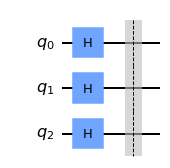

In [3]:
# Criação do circuito
qc = QuantumCircuit(3)

#Inicialização
qc.h([0,1,2])

qc.barrier()
    
qc.draw(output='mpl')    

#### 1.2 Oráculo

O oráculo vai ser o responsavel por detetar a solução do problema, ou seja, vai detetar quando é que o estado é $|000\rangle$ e torna-o negativo através de uma rotação .

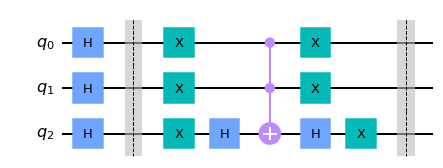

In [4]:
#Oraculo
qc.x([0,1,2])

qc.h(2)
qc.ccx(0,1,2)
qc.h(2)

qc.x([0,1,2])

qc.barrier()
qc.draw(output='mpl')  

#### 1.3 Amplificação

A amplificação ajuda a evidenciar a solução do resto dos resultados. Isto é conseguido aumentando a amplitude da solução e diminuindo a amplitude dos restantes estados. Este passo pode ser repetido mas não foi necessário pois os resultados já são bastante próximo do que seria ideal.

In [5]:
qc.h([0,1,2])
qc.x([0,1,2])

qc.h(2)
qc.ccx(0,1,2)
qc.h(2)

qc.x([0,1,2])
qc.h([0,1,2])

    
qc.barrier()

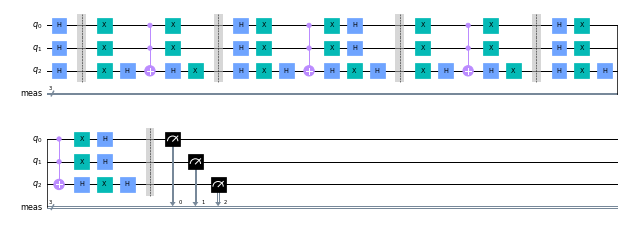

In [6]:
qc.x([0,1,2])

qc.h(2)
qc.ccx(0,1,2)
qc.h(2)

qc.x([0,1,2])

qc.barrier()


qc.h([0,1,2])
qc.x([0,1,2])

qc.h(2)
qc.ccx(0,1,2)
qc.h(2)

qc.x([0,1,2])
qc.h([0,1,2])

qc.measure_all()
qc.draw(output='mpl', scale=0.5)

### 2. Application of noise simulator ;

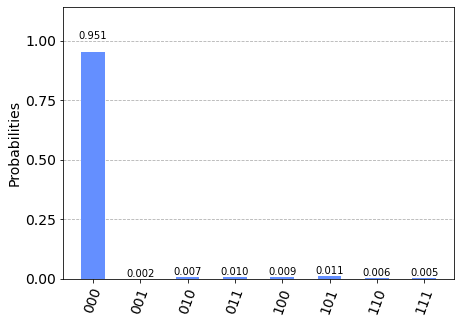

In [7]:
# Almost Perfect Results on the simulator
backend = Aer.get_backend('qasm_simulator')

simulated_results = execute(qc, backend=backend, shots=1024).result()
simulated_counts = simulated_results.get_counts(qc)

plot_histogram(simulated_counts)

/home/uilyam/anaconda3/envs/ic/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


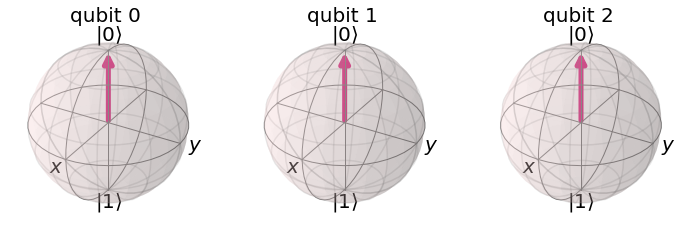

In [8]:
backend = BasicAer.get_backend('statevector_simulator')

psi_vector = execute(qc, backend).result().get_statevector()

plot_bloch_multivector(psi_vector)

### 3. Execution in an IBM Q backend.

Para conseguir correr estes circuitos no IBMQ vamos ter de seguir os seguintes passos:

##### 1. Carregar a conta que queremos utilizar

In [9]:
#IBMQ.save_account('c038dce2aa50be0235d0fd9525552638dd467bb6e278ed1e31a6731bf912cbfae065a280b9af1f737631ea861dbc344dbe75b407c6bcb27654a2b9e434336b7f',overwrite=True)
provider = IBMQ.load_account()

##### 2. Decidir qual o device que vamos utilizar para correr o circuito

In [10]:
backends_list = provider.backends( simulator=False, open_pulse=False)

In [40]:
# Backend overview
from qiskit.tools.monitor import backend_overview, backend_monitor
import qiskit.tools.jupyter

%qiskit_backend_overview

In [13]:
backend_device = provider.get_backend('ibmq_santiago')

print("Running on: ", backend_device)

Running on:  ibmq_santiago


##### 3. Executar o circuito no device de maneira a obter o seu id

In [14]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [15]:
ibmq_job = execute(qc, backend_device, shots=1024)

ibmq_jobID = ibmq_job.job_id()

print('JOB ID: {}'.format(ibmq_jobID))

JOB ID: 60bb9ba2917aa050ba9b6d57


##### 4. Usar o Id do Trabalho para obter os resultados pretendidos

In [16]:
job_get=backend_device.retrieve_job("60bb9ba2917aa050ba9b6d57")

ibmq_results = job_get.result()
ibmq_counts = ibmq_results.get_counts(qc)

Por fim podemos então comparar os resultados obtidos pela simulação anterior com os resultados obtido com o device real. 

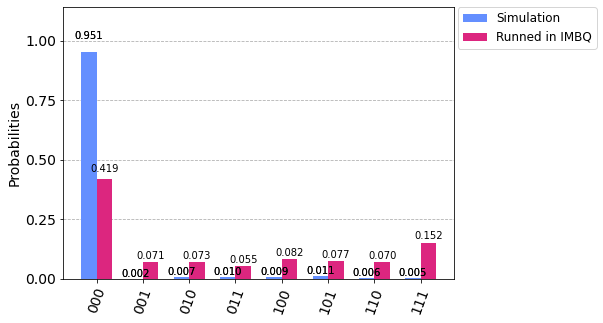

In [17]:
plot_histogram([ simulated_counts,ibmq_counts], 
               legend=['Simulation','Runned in IMBQ'])

Como estávamos à espera os resultados obtidos pela simulação é bastante mais elevado do que o resultado obtido pela máquina real devido a vários erros. Nos pontos seguintes, vamos tentar melhorar este circuito nesse aspeto.

### 3.5 Optimize

#### Transpile  

É um processo no qual recebe um circuito e devolve um outro circuito com certas transformações
de modo a coincidir com um dispositivo quantico específico e / ou otimizar o circuito original de 
modo a reduzir os efeitos do ruído.

#### Níveis de optimização 
Temos 4 níveis de optimização:

##### Nível 0: 
Não faz nenhuma optimização explícita, apenas tenta       tornar o circuito executável, mapeando-o para o back-end.

##### Nível 1: 
É uma optimização leve, onde fecha portas adjacentes.

##### Nível 2: 
Fornece uma optimização média, no qual transpiler faz algumas análises de comutação para ver quais das portas podem ser fechadas e mapeia qubits adaptáveis ao ruído.

##### Nível 3: 
Último nível de optimização que oferece uma optimização pesada. Para além do que o nível 2 faz,    este nível também cancelas as portas por síntese unitária.

Referências:

https://qiskit.org/documentation/apidoc/transpiler.html

https://github.com/Qiskit/qiskit-terra/tree/master/qiskit/transpiler/preset_passmanagers

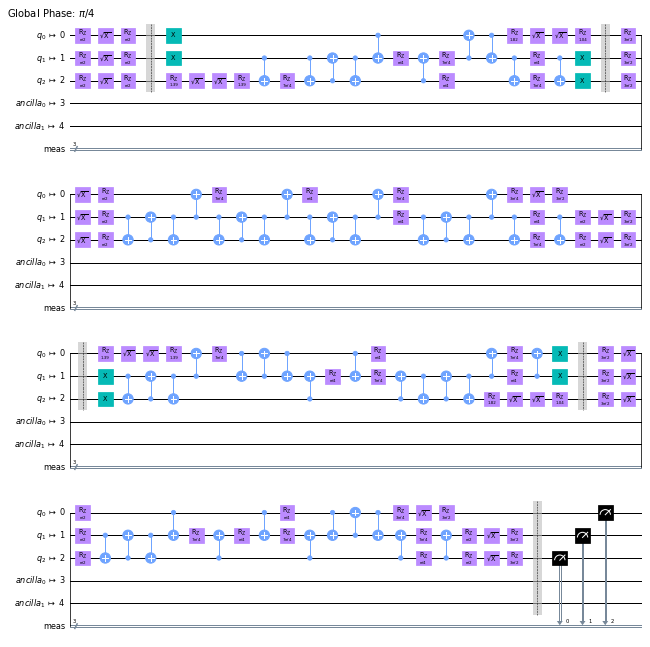

In [36]:
qc_op0 = transpile(qc, backend=backend_device)

qc_op0.draw(output='mpl', scale=0.5)

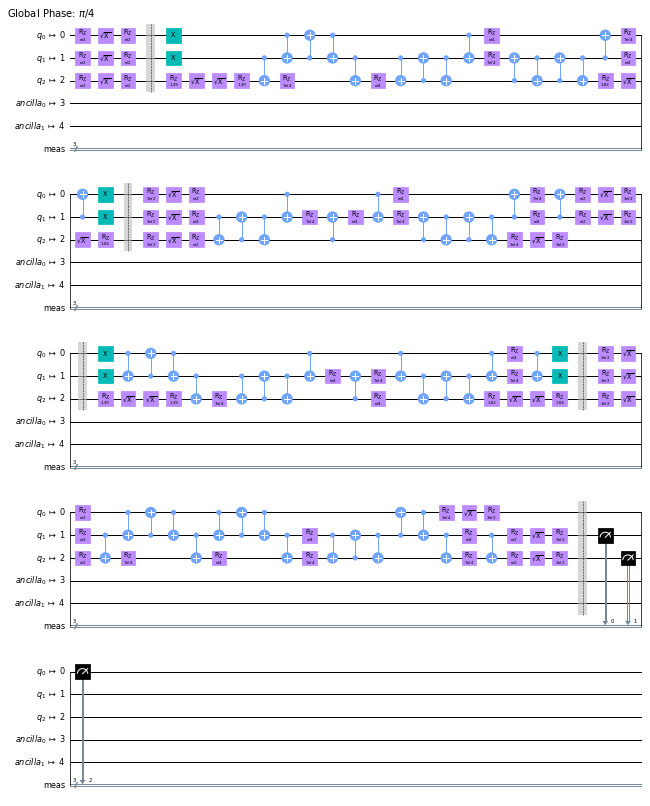

In [19]:
qc_op1 = transpile(qc, backend=backend_device, optimization_level=1)
qc_op1.draw(output='mpl', scale=0.5)

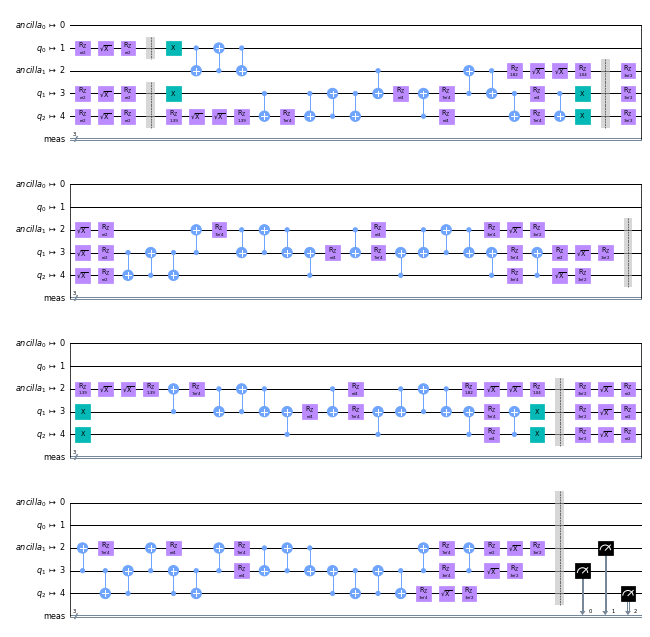

In [20]:
qc_op2 = transpile(qc, backend=backend_device, optimization_level=2)
qc_op2.draw(output='mpl', scale=0.5)

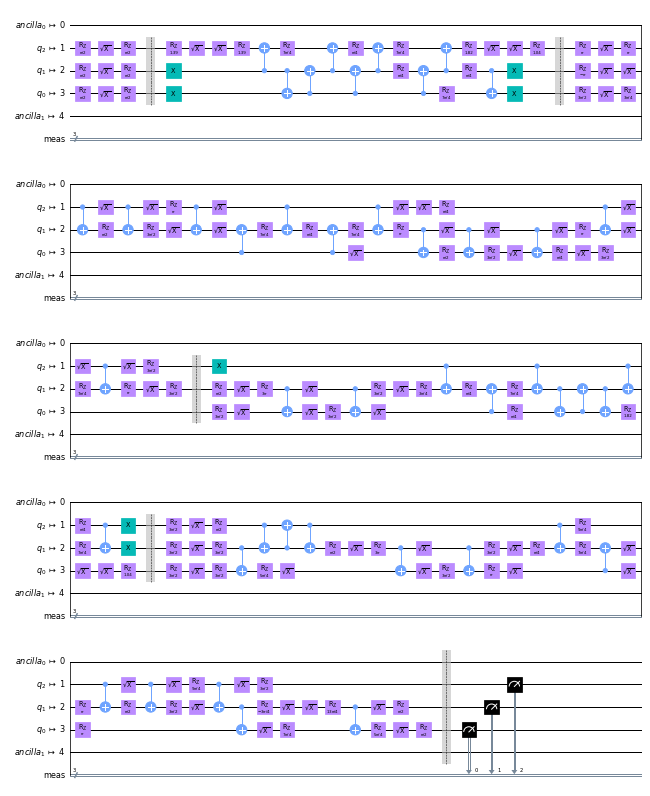

In [21]:
qc_op3 = transpile(qc, backend=backend_device, optimization_level=3)
qc_op3.draw(output='mpl', scale=0.5)

In [37]:
job_op0 = execute(qc_op0, backend_device, shots=1024)

jobID_op0 = job_op0.job_id()

print('JOB ID: {}'.format(jobID_op0))

JOB ID: 60bb9e195f4eaa6079daec46


In [22]:
job_op1 = execute(qc_op1, backend_device, shots=1024)

jobID_op1 = job_op1.job_id()

print('JOB ID: {}'.format(jobID_op1))

JOB ID: 60bb9c3a1eb0246908cee905


In [23]:
job_op2 = execute(qc_op2, backend_device, shots=1024)

jobID_op2 = job_op2.job_id()

print('JOB ID: {}'.format(jobID_op2))

JOB ID: 60bb9c43b454d04c29aa66b5


In [24]:
job_op3 = execute(qc_op3, backend_device, shots=1024)

jobID_op3 = job_op3.job_id()

print('JOB ID: {}'.format(jobID_op3))

JOB ID: 60bb9c48917aa024a39b6d60


In [38]:
get_job_op0 = backend_device.retrieve_job("60bb9e195f4eaa6079daec46")
results_op0 = get_job_op0.result()
counts_op0 = results_op0.get_counts(qc_op0)

In [25]:
get_job_op1 = backend_device.retrieve_job("60bb9c3a1eb0246908cee905")
results_op1 = get_job_op1.result()
counts_op1 = results_op1.get_counts(qc_op1)

In [26]:
get_job_op2 = backend_device.retrieve_job("60bb9c43b454d04c29aa66b5")
results_op2 = get_job_op2.result()
counts_op2 = results_op2.get_counts(qc_op2)

In [27]:
get_job_op3 = backend_device.retrieve_job("60bb9c48917aa024a39b6d60")
results_op3 = get_job_op3.result()
counts_op3 = results_op3.get_counts(qc_op3)

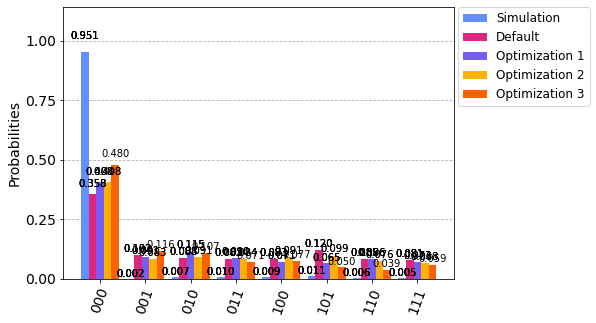

In [42]:
plot_histogram([simulated_counts,counts_op0,counts_op1,counts_op2,counts_op3], 
               legend=['Simulation','Default','Optimization 1','Optimization 2','Optimization 3'])

Depois de correr tudo podemos observar os resultados e concluir que as optimizações conseguem aumentar a probabilidade de o output ser o resultado pretendido diminuindo a probabilidade dos restantes resultados. 

Percebemos também que mesmo com o aumento desta probabilidade não chega perto do resultado da simulação (resultado "ótimo")

### 4. Mitigation of Error with Ignis.

Queremos agora minimizar os danos feito pelo ruído. Faremos uso da framework Ignis do Qiskit.
Esta framework fornece ferramentas para verificação de hardware quantum, caracterização de ruído e correção de erros.

Assim conseguiremos mitigar o ruído proveniente dos circuitos e sistemas quânticos.

Utilizaremos funções de calibração de medição (funções da framework Ignis) para tentarmos corrigir os resultados médios da nossa experiência.

Primeiro temos de gerar uma lista de circuitos de calibração. Cada cicuito cria um estado base. Se temos $ n=3 $ qubits, então vamos ter $ 2³=8 $ circuitos de calibração.

In [30]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)
qr = QuantumRegister(3)

meas_calibs, state_labels = complete_meas_cal(qubit_list = [0,1,2],qr = qr,circlabel = 'mcal')

print(len(state_labels),':',state_labels)

8 : ['000', '001', '010', '011', '100', '101', '110', '111']


Se corrermos o circuito no simulador os resultados serão quase perfeitos como demonstrado em baixo:

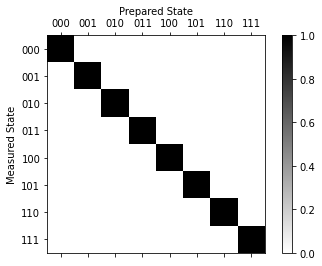

In [31]:
backend = qiskit.Aer.get_backend('qasm_simulator')
perfect_job = qiskit.execute(meas_calibs, backend=backend, shots=1024)
perfect_results = perfect_job.result()

perfect_meas_fitter = CompleteMeasFitter(perfect_results, state_labels)

perfect_meas_fitter.plot_calibration()

Na realidade a matriz vai ter algum noise. Correndo num device real vamos ter resultados diferentes. A grande parte dos resultados vão continuar a aparecer na diagonal da matriz mas alguns resultados vão aparecer fora desta

In [32]:
real_job = execute(meas_calibs, backend=backend_device, shots=1024)

real_jobID = real_job.job_id()

print('JOB ID: {}'.format(real_jobID))

JOB ID: 60bb9d19917aa0119b9b6d6b


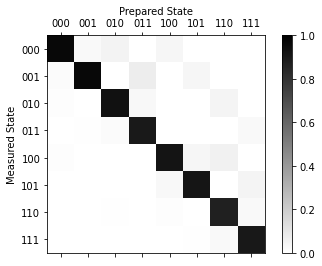

In [33]:
real_job_get=backend_device.retrieve_job("60bb9d19917aa0119b9b6d6b")
real_results = real_job_get.result()
real_meas_fitter = CompleteMeasFitter(real_results, state_labels)
real_meas_fitter.plot_calibration()

Então tendo como base estes resultados podemos criar um filtro que nos vai ajudar os nossos resultados

In [34]:
meas_filter = real_meas_fitter.filter
mitigated_results = meas_filter.apply(ibmq_results) # resultados do nosso qc
mitigated_counts = mitigated_results.get_counts()

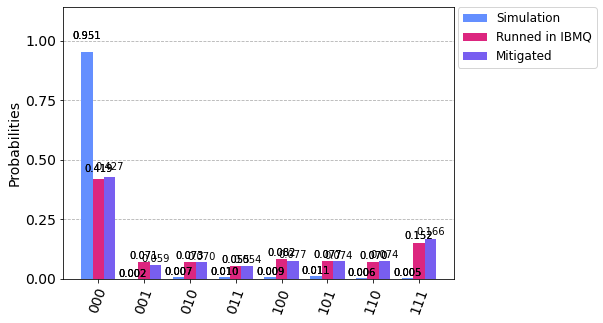

In [35]:
plot_histogram([simulated_counts, ibmq_counts, mitigated_counts], 
               legend=['Simulation','Runned in IBMQ', 'Mitigated'])

Como mostra o gráfico a cima, os resultados obtidos após a mitigação dos erros são melhores para obtenção do resultado pretendido do que os resultados em que não se usou a mitigação.

Interessante ainda verificar que estes resultados ficam áquem dos quase 100% de probabilidade da simulação devido a erros.